# Homework 2
## William Olsen

In [1]:
# general imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

### Question 1

> A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

There are $6*6$ total combinations for the rolls of two six sided dice.  There is only one way to get snake eyes (rolling a one on each dice) compared to many ways to roll a seven.

Note: For this problem and subsequent problems we will note that the probability of one outcome on a 6-sided dice is $\frac{1}{6}$

Rolling a seven: 1/6, 2/5, 3/4, 4/3, 5/2, 6/1 - thus there are 6 ways to roll a seven.

$$\text{P(snake eyes)} = \frac{1}{36} = 0.0278$$

$$\text{P(seven)} = \frac{6}{36} = 0.167$$

Another method to get this same result is to ask the question: _What is the probabily of rolling a 1 AND a 1?_ which is $\frac{1}{6} * \frac{1}{6} = \frac{1}{36}$

And to calculate the probability of getting seven we use the convolution operator: $P(7) = \sum_z P_{dice1}(z) P_{dice2}(7-z)$ where $1 \le z \le 6$ so we have:

$$P(7) = P(1)*P(6) + P(2)*P(5) + P(3)*P(4) + P(4)*P(3) + P(5)*P(2) + P(6)*P(1) = 6 * \frac{1}{36} = \frac{6}{36}$$

Their ratio: $\frac{\frac{1}{36}}{\frac{6}{36}} = \frac{1}{6} = 0.167$

### Question 2

> Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

We need to know the probabilities of rolling 2 all the way up to rolling 12.  We can determine these probabilities using the convolutional operator: $P(x) = \sum_z P_{dice1}(z) P_{dice2}(x-z)$.  Recall again that $1 \le z \le 6$ and also that $P(a) = \frac{1}{6}$ if $1 \le z \le 6$ otherwise $P(a) = 0$.  Thus:

$$P(2) = P(1)*P(1) = \frac{1}{36}$$
$$P(3) = P(1)*P(2) + P(2)*P(1) = \frac{2}{36}$$
$$P(4) = P(1)*P(3) + P(2)*P(2) + P(3)*P(1) = \frac{3}{36}$$
$$P(5) = P(1)*P(4) + P(2)*P(3) + P(3)*P(2) + P(4)*P(1) = \frac{4}{36}$$
$$P(6) = P(1)*P(5) + P(2)*P(4) + P(3)*P(3) + P(4)*P(2) + P(5)*P(1) = \frac{5}{36}$$
$$P(7) = P(1)*P(6) + P(2)*P(5) + P(3)*P(4) + P(4)*P(3) + P(5)*P(2) + P(6)*P(1) = \frac{6}{36}$$
$$P(8) = P(2)*P(6) + P(3)*P(5) + P(4)*P(4) + P(5)*P(3) + P(6)*P(2) = \frac{5}{36}$$
$$P(9) = P(3)*P(6) + P(4)*P(5) + P(5)*P(4) + P(6)*P(3) = \frac{4}{36}$$
$$P(10) = P(4)*P(6) + P(5)*P(5) + P(6)*P(4) = \frac{3}{36}$$
$$P(11) = P(5)*P(6) + P(6)*P(5) = \frac{2}{36}$$
$$P(12) = P(6)*P(6) = \frac{1}{36}$$

Now lets compute these same values numerically and plot the result

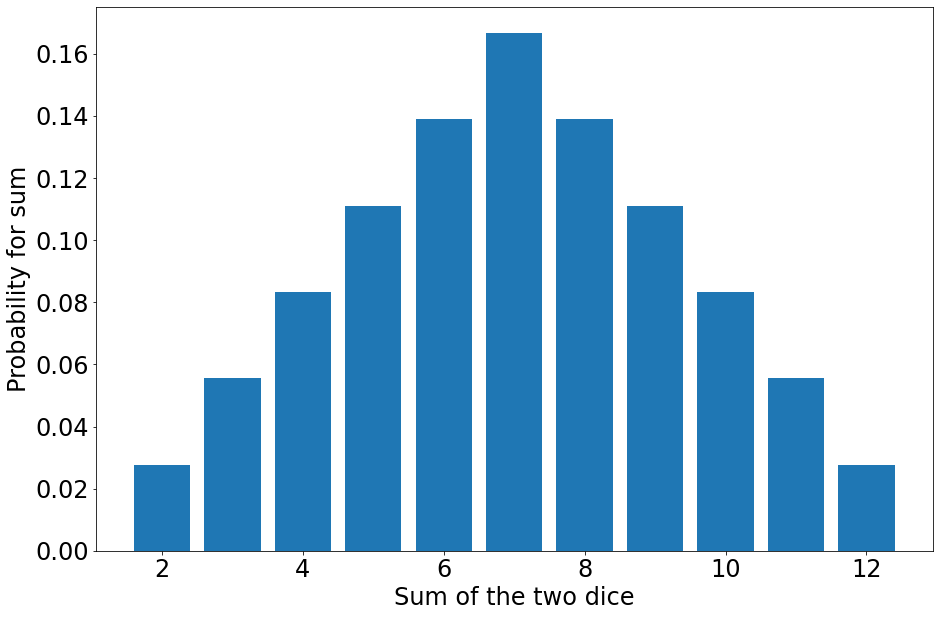

In [2]:
x = np.linspace(2, 12, 11)
dice_probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
y = np.convolve(dice_probabilities, dice_probabilities)
plt.bar(x, y)
plt.tick_params(labelsize=24)
plt.xlabel("Sum of the two dice", fontdict={'size':24})
plt.ylabel("Probability for sum", fontdict={'size':24})
plt.show()

### Question 3

> Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

To calculate the variance and the mean of the distribution we will use python to evaluate the following equations:

$$\mu = E[X] = \sum_{k=2}^{12} k * P(k)$$
$$\sigma^2 = E[X^2] - E[X]^2 = \sum_{k=2}^{12} k^2 * P(k) - \mu^2$$

In [3]:
# lets calculate the mean of the distribution
expected_value = 0
for i in range(0, len(x)):
    expected_value += x[i] * y[i]
print(f'Mean when caluclated using a for loop: {expected_value}')

# lets calculate the variance
e_x_squared = 0
for i in range(0, len(x)):
    e_x_squared += (x[i]**2) * y[i]
variance = e_x_squared - (expected_value**2)
print(f'Variance of the distribution: {variance:.3f}')

Mean when caluclated using a for loop: 7.0
Variance of the distribution: 5.833


After evaluation we find that $\mu = 7.0$ and $\sigma^2 = 5.833$

### Question 4

> Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

First we will plot the sum of the 10 dice by leveraging the convolutional operator.

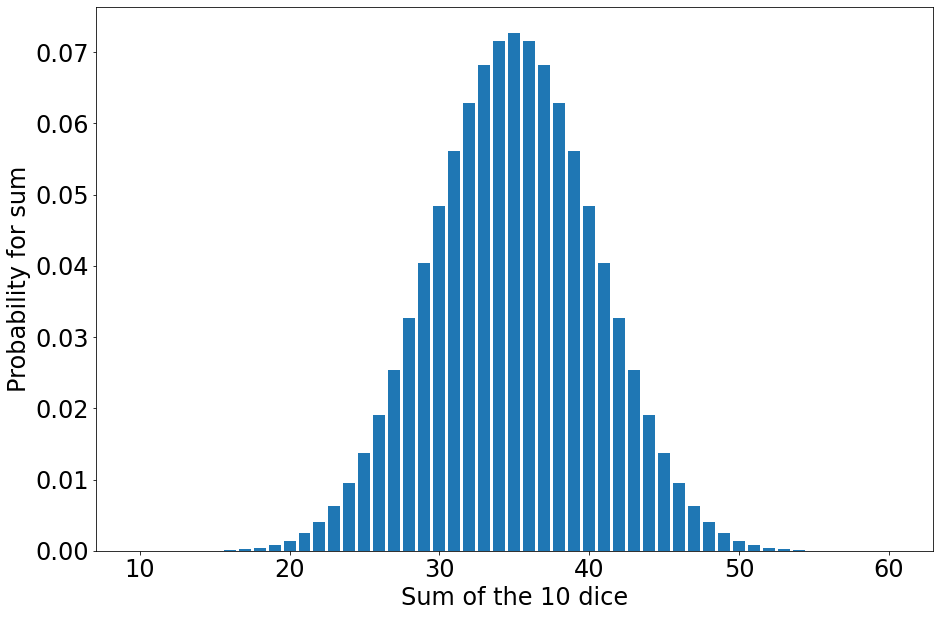

In [4]:
y10 = dice_probabilities
for i in range(0, 9):
    y10 = np.convolve(y10, dice_probabilities)
x10 = np.linspace(10, 60, len(y10))
plt.bar(x10, y10)
plt.tick_params(labelsize=24)
plt.xlabel("Sum of the 10 dice", fontdict={'size':24})
plt.ylabel("Probability for sum", fontdict={'size':24})
plt.show()

Now we will look at the average value of one dice roll provided that we are rolling 10 dice.  We will do this by convolving the results of the dice rolls and then plotting the average value for the 10 dice rolls.  We will have to rescale our x coordinates in order to do this

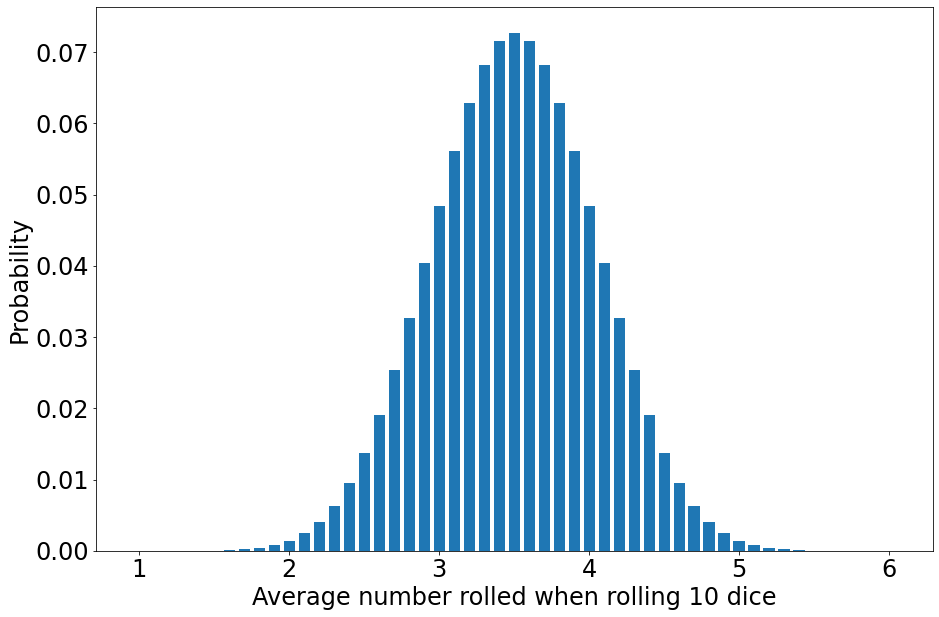

In [5]:
# get the arrays for the average plot
y10_avg = y10
x10_avg = x10 / 10

plt.bar(x10_avg, y10_avg, width=0.075)
plt.tick_params(labelsize=24)
plt.xlabel("Average number rolled when rolling 10 dice", fontdict={'size':24})
plt.ylabel("Probability", fontdict={'size':24})
plt.show()

From the above plot of the average we see that, visually, we have a Gaussian.  To be sure however we will plot the same data on the semi-log plot and search for a parabolic shape.

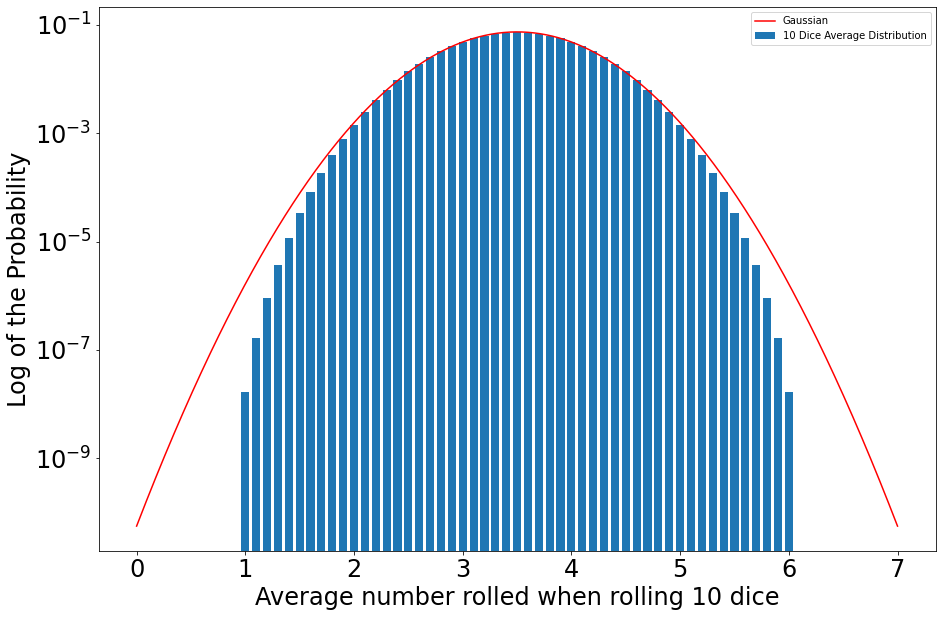

In [6]:
plt.bar(x10_avg, y10_avg, width = 0.075, label="10 Dice Average Distribution")
plt.yscale('log')
plt.tick_params(labelsize=24)
plt.xlabel("Average number rolled when rolling 10 dice", fontdict={'size':24})
plt.ylabel("Log of the Probability", fontdict={'size':24})

# we will also plot a guassian for comparison:
x_gaus_10_dice = np.linspace(0, 7, 1000)
y_gaus_10_dice = stats.norm.pdf(x_gaus_10_dice, loc=3.5, scale=math.sqrt(5.833/20))
y_gaus_10_dice *= 0.1
plt.plot(x_gaus_10_dice, y_gaus_10_dice, 'r', label="Gaussian")
plt.legend()

plt.show()

From the above plot while our histogram does look slightly parabolic we see, when comparing it to a Gaussian plotted on the semi-log scale, that our distribution is indeed not a Gaussian.  We see that near the tails of our distribution our behavior is no longer Gaussian as the distribution falls off very quickly as we get closer to the bounds of 1 and 6.  Our distribution is significantly limited in it's ability to converge to a Gaussian curve for one important reason: it is defined over a limited range while the Gaussian is defined from $-\infty$ to $\infty$.  This is not an issue with out distribution being discrete because we know that after convolving many Poisson's together we will converge to a Gaussian and the Poisson is a discrete distribution - it is a matter of our distribution not being defined on the same range of values as the Gaussian is.  This limitation results is seen in the much sharper fall off near the edge boundaries which does not match the behavior of the Gaussian.

### Question 5

> Show that the sum and average of an initially Gaussian distribution is also a Gaussian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Gaussian change? This is a hugely important result. Explore what this means for integrating a signal over time.

To determine if the sum and average of the Gaussian is also Gaussian we will plot the sum and average and then plot the same data on a semi-log scale.  If the semi-log plot is a parabola then we know that we do indeed still have a Gaussian distribution after summing or averaging, respectively. 

Let us first visualize the basic normal Gaussian that we will be convolving with itself.

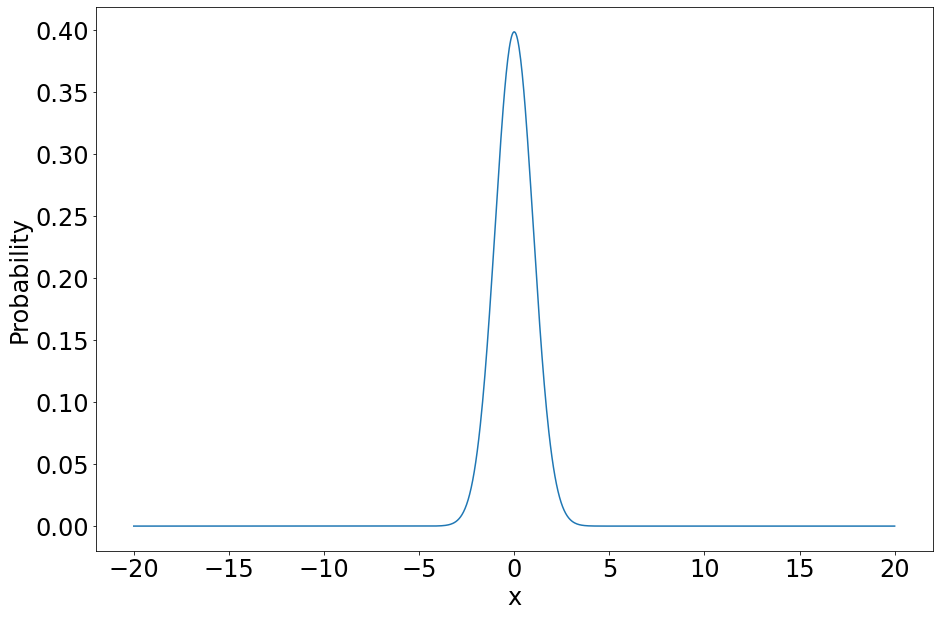

In [7]:
x_fine = np.linspace(-20, 20, 1000)
gaus_probabilities = stats.norm.pdf(x_fine, loc=0, scale=1)
plt.plot(x_fine, gaus_probabilities)
plt.tick_params(labelsize=24)
plt.xlabel("x", fontdict={'size':24})
plt.ylabel("Probability", fontdict={'size':24})
plt.show()

For plotting the sum of two Gaussian we will take the previous resulting probabilities and convolve those probabilities with themselves to determine the y value probabilities for the sum of two Gaussian curves.  Once we perform the convolution our fine grid will no longer be large enough so we will have to make a new fine grid to cover the whole space from -40 to 40, of proper length.

Note: we will also zoom in to -20 to 20 to get a better, and more comparable, graph.

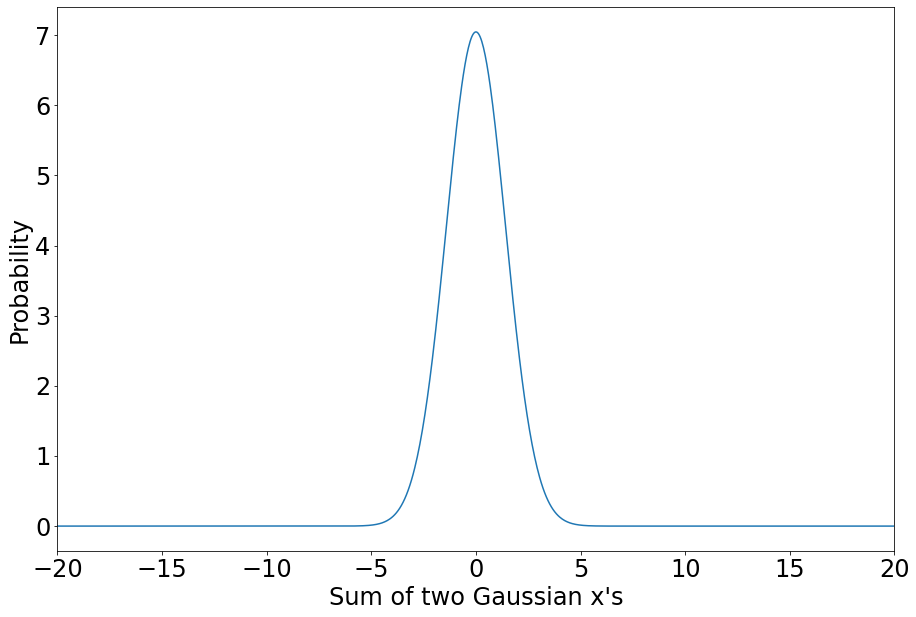

In [8]:
gaus_probabilities_convolved = np.convolve(gaus_probabilities, gaus_probabilities)
x_fine_convolved = np.linspace(-40, 40, len(gaus_probabilities_convolved))

plt.plot(x_fine_convolved, gaus_probabilities_convolved)
plt.tick_params(labelsize=24)
plt.xlabel("Sum of two Gaussian x's", fontdict={'size':24})
plt.ylabel("Probability", fontdict={'size':24})
plt.xlim(-20, 20)
plt.show()

Comparing the sum graph above with the graph of a single Gaussian we see that the width of the Gaussian has increased.  Now a value of 4 is much more common than it was previously (previously being nearly zero).

Now to see if this sum is still a Gaussian we will plot the on a semi-log scale and see if we have an inverted parabola.

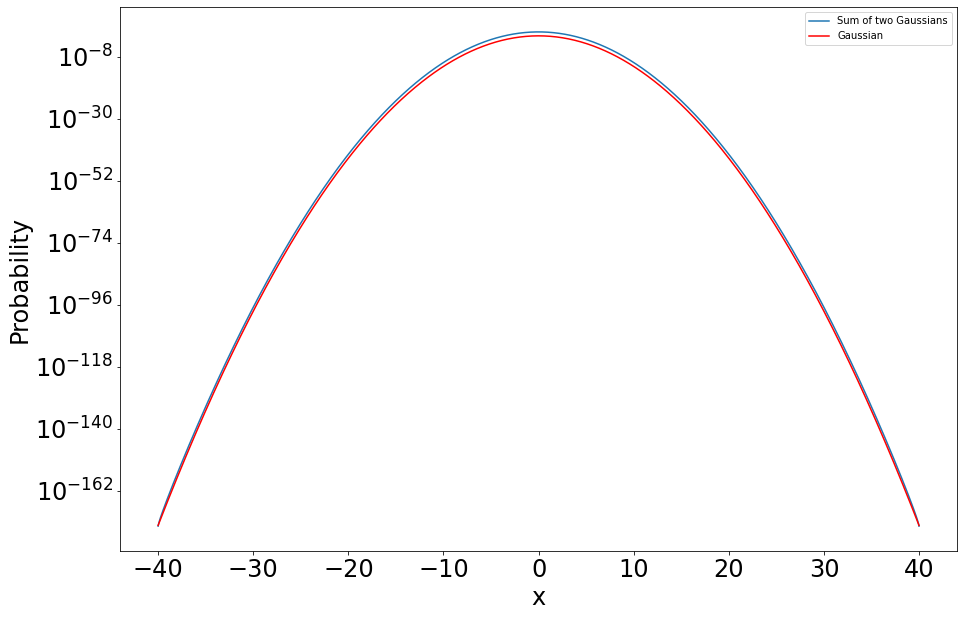

In [9]:
plt.plot(x_fine_convolved, gaus_probabilities_convolved, label='Sum of two Gaussians')
plt.yscale('log')
plt.tick_params(labelsize=24)
plt.xlabel("x", fontdict={'size':24})
plt.ylabel("Probability", fontdict={'size':24})

x_guas = np.linspace(-40, 40, 1000)
y_guas = stats.norm.pdf(x_guas, loc=0, scale=math.sqrt(2))
plt.plot(x_guas, y_guas, 'r', label="Gaussian")
plt.legend()

plt.show()

From the above we see that the sum of two Gaussian does indeed produce a Gaussian because we have the blue curve being an inverse parabola.

Next let's plot the average value of two Gaussian.  To do this we will first convolve the probability of a Gaussian with itself then we will rescale the axis by a factor of 0.5.  We previously already computed the convolution for the last graph so we will re-use that.

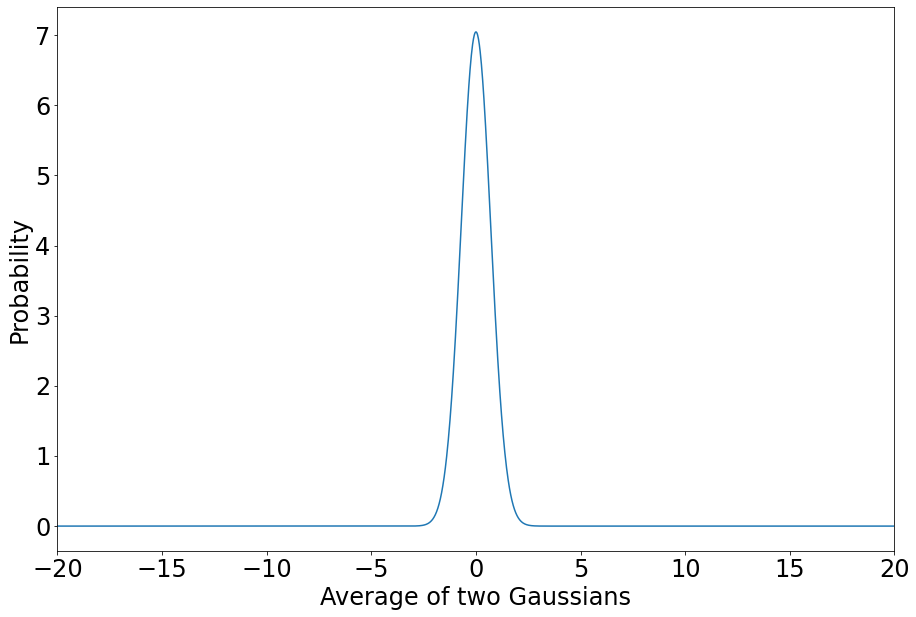

In [10]:
# let us rescale the x coordinates
x_fine_convolved_avg = x_fine_convolved / 2
gaus_probabilities_convolved_avg = gaus_probabilities_convolved

plt.plot(x_fine_convolved_avg, gaus_probabilities_convolved_avg)
plt.tick_params(labelsize=24)
plt.xlabel("Average of two Gaussians", fontdict={'size':24})
plt.ylabel("Probability", fontdict={'size':24})
plt.xlim(-20, 20)
plt.show()

In the above plot we see the opposite of what we saw with the sum plot: the width of the Gaussian decreased.  

To determine if this is a Gaussian we will once again plot on a semi-log scale and look for an inverse parabola.

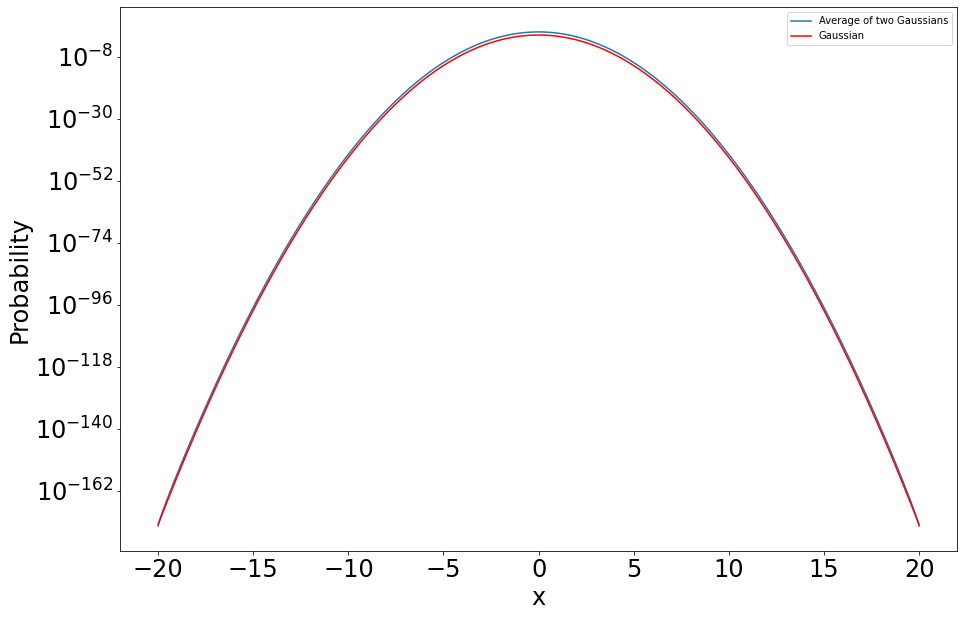

In [11]:
plt.plot(x_fine_convolved_avg, gaus_probabilities_convolved_avg, label='Average of two Gaussians')
plt.yscale('log')
plt.tick_params(labelsize=24)
plt.xlabel("x", fontdict={'size':24})
plt.ylabel("Probability", fontdict={'size':24})

x_gaus = np.linspace(-20, 20, 1000)
y_gaus = stats.norm.pdf(x_gaus, loc=0, scale=math.sqrt(1/2))
plt.plot(x_gaus, y_gaus, 'r', label="Gaussian")
plt.legend()

plt.show()

From the above we see that the sum of two Gaussian does indeed produce a Gaussian because we have the blue curve being an inverse parabola.

Let us know explore how the width changed to see if there is a dependence on the number of times we convolve.

We will calculate the mean, variance and then standard deviation of the sum of two normal Gaussian.

In [12]:
# we define a helper function to calculate an expectation value
def exp_value (x, P, d, bin_width):
    expected_value = 0
    for i in range(0, len(x)):
        expected_value += ((x[i]*bin_width)**d) * P[i]
    return expected_value

# first lets calculate the mean, variance and standard deviation of the sum
bin_width = (x_fine_convolved[len(x_fine_convolved) - 1] - x_fine_convolved[0]) / len(x_fine_convolved)
mean_sum = exp_value(x_fine_convolved, gaus_probabilities_convolved, 1, bin_width)
variance_sum = exp_value(x_fine_convolved, gaus_probabilities_convolved, 2, bin_width) - (mean_sum**2)
std_sum = math.sqrt(variance_sum)
print(f'Sum - Mean: {mean_sum:.3f}, Variance: {variance_sum:.3f}, Standard Deviation: {std_sum:.3f}')

# next lets calculate the mean, variance and standard deviation of the average
mean_sum_avg = exp_value(x_fine_convolved_avg, gaus_probabilities_convolved_avg, 1, bin_width)
variance_sum_avg = exp_value(x_fine_convolved_avg, gaus_probabilities_convolved_avg, 2, bin_width) - (mean_sum_avg**2)
std_sum_avg = math.sqrt(variance_sum_avg)
print(f'Average - Mean: {mean_sum_avg:.3f}, Variance: {variance_sum_avg:.3f}, Standard Deviation: {std_sum_avg:.3f}')

Sum - Mean: 0.000, Variance: 1.998, Standard Deviation: 1.414
Average - Mean: 0.000, Variance: 0.499, Standard Deviation: 0.707


From above we see that we got a standard deviation of 1.414 for the sum distribution and a standard deviation of 0.707 for the average distribution when we had a standard deviation of 1.0 for the original, single, Gaussian.  From this we can derive that the sum distribution has a standard deviation of $\sqrt{2}\sigma$ where $\sigma=1$ and the average distribution has a standard deviation of $\frac{1}{\sqrt{2}}\sigma$.  This result is general where when we take the sum of multiple distributions the standard deviation changes by a factor of $\sqrt{N}$ where $N$ is the number of distributions summed.  Similarly when we average $N$ distributions the standard deviation changes by a factor of $\frac{1}{\sqrt{N}}$.

This result tells us that when we integrate (average) a distribution over time we will decrease our standard deviation by a factor of $\frac{1}{\sqrt{N}}$ thus making events further from the mean very unlikely.